In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout  
from keras.initializers import glorot_normal
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
import pandas as pd
file_path = r'C:\Users\92349\Desktop\Prodigy internship\archive\twitter_training.csv'

df = pd.read_csv(file_path, header=None)



In [3]:
df.columns = ['ID', 'Brand', 'Sentiment', 'Text']

In [4]:
df.head()

,ID,Brand,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Text Cleaning

In [5]:
import re

def clean_text(text):
    # Check if text is a string
    if not isinstance(text, str):
        return text
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric shapes
        "\U0001F800-\U0001F8FF"  # Miscellaneous Symbols and Arrows
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Extended-A
        "\U0001FA70-\U0001FAFF"  # Extended-B
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+"
    )
    text = emoji_pattern.sub(r'', text)
    # Remove special characters and emojis
    text = re.sub(r'[^\w\s]', '', text)
    return text



In [6]:
df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [7]:
df

,ID,Brand,Sentiment,Text,Cleaned_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized between the windows partition of...


In [8]:

df.drop(['ID', 'Brand'], axis=1, inplace=True)


In [9]:
df.head()

,Sentiment,Text,Cleaned_Text
0,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


# Sentiment Analysis

In [13]:
df= df.drop_duplicates()


In [14]:

df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

df['Sentiment'].value_counts()


Neutral     29321
Negative    21238
Positive    19139
Name: Sentiment, dtype: int64

In [15]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [16]:
label_encoder = LabelEncoder()

In [17]:
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])

In [32]:
df = df.dropna(subset=['Cleaned_Text'])

In [20]:
tokenizer= Tokenizer()

Comments= df['Cleaned_Text'].tolist()
tokenizer.fit_on_texts(Comments)

In [21]:
sequences= tokenizer.texts_to_sequences(Comments)
print('The max length in Comments is:',max([len(x) for x in sequences]))
print('The Unique word in the Comments are:',len(tokenizer.word_index))

The max length in Comments is: 166
The Unique word in the Comments are: 40027


In [22]:
input_pad_sequences= pad_sequences(sequences,maxlen=70 ,padding= 'pre')


In [24]:
X= input_pad_sequences
y= df['Sentiment']

In [25]:
le= LabelEncoder()
y= le.fit_transform(y)

y= to_categorical(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55756, 70)
(13939, 70)
(55756, 3)
(13939, 3)


In [27]:
from keras.initializers import glorot_normal

model = Sequential()

# Apply Xavier/Glorot initialization to the Embedding layer
model.add(Embedding(40758, 200, input_length=70, embeddings_initializer=glorot_normal()))

model.add(LSTM(100, return_sequences=True,dropout=0.6 ))


model.add(LSTM(100, return_sequences=True,dropout=0.6 ))

model.add(LSTM(100, return_sequences=True,dropout=0.6 ))


model.add(LSTM(100))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [34]:
model.compile(optimizer= 'adam',loss= 'categorical_crossentropy',metrics= ['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [35]:
history = model.fit(
    X_train, y_train,
    epochs=10, batch_size=32,
    callbacks= callback,

    validation_data=(X_test,y_test))

Epoch 1/10
1743/1743 [==============================] - 670s 377ms/step - loss: 0.0847 - accuracy: 0.9691 - val_loss: 0.2909 - val_accuracy: 0.9212
Epoch 2/10
1743/1743 [==============================] - 645s 370ms/step - loss: 0.0742 - accuracy: 0.9728 - val_loss: 0.3228 - val_accuracy: 0.9204
Epoch 3/10
1743/1743 [==============================] - 634s 364ms/step - loss: 0.0692 - accuracy: 0.9743 - val_loss: 0.3250 - val_accuracy: 0.9191
Epoch 4/10
1743/1743 [==============================] - 604s 347ms/step - loss: 0.0643 - accuracy: 0.9766 - val_loss: 0.2981 - val_accuracy: 0.9232


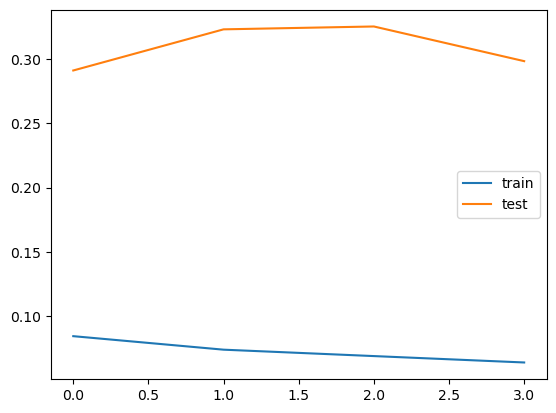

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label= 'train')
plt.plot(history.history['val_loss'],label= 'test')
plt.legend()

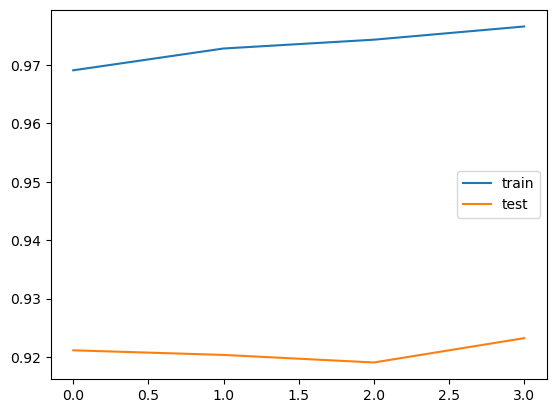

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label= 'train')
plt.plot(history.history['val_accuracy'],label= 'test')
plt.legend()
plt.show()

In [38]:
loss, accuracy= model.evaluate(X_test,y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

436/436 [==============================] - 61s 140ms/step - loss: 0.2909 - accuracy: 0.9212
Test Loss: 0.2909
Test Accuracy: 92.12%
